# Task 6.4 - Supervised Machine Learning- Regression

This notebook contains-

Loading Dataset


Cleaning Dataset

Exploring Data Visually trough Scatterplot

Reshaping the variables into NumPy arrays


Spliting the data into training and test sets

Runing a linear regression

Creating a plot of the regression line


Checking model performance statistics

Comparing predicted and actual values

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading Dataset

In [3]:
# Loading cleaned COVID-19 data
path = r'C:\Users\Sanket\Documents\Achievement 6\Data\Prepared data\Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'
df_covid = pd.read_csv(path)

# Display the first few rows of the dataset
print(df_covid.head())

   Data As Of  Start Date    End Date    Year  Month    State  \
0  2023-09-24  2020-01-01  2020-01-31  2020.0    1.0  Alabama   
1  2023-09-24  2020-02-01  2020-02-29  2020.0    2.0  Alabama   
2  2023-09-24  2020-03-01  2020-03-31  2020.0    3.0  Alabama   
3  2023-09-24  2020-04-01  2020-04-30  2020.0    4.0  Alabama   
4  2023-09-24  2020-05-01  2020-05-31  2020.0    5.0  Alabama   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
2  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
3  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
4  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   

   COVID-19 Deaths  Number of Mentions Flag  
0              0.0                 0.0  NaN  
1              0.0                 0.0  NaN  
2              0.0        

# Cleaning Dataset

In [4]:
# Check for missing values
print(df_covid.isnull().sum())

Data As Of                 0
Start Date                 0
End Date                   0
Year                       0
Month                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       150829
Number of Mentions    146491
Flag                  279731
dtype: int64


## Imputing Missing Values

In [5]:
# Define a function to generate random integers between 1 and 9
def random_1_to_9(series):
    return series.apply(lambda x: np.random.randint(1, 10) if pd.isnull(x) else x)



In [6]:
# Identify rows with suppression flag
suppression_message = "One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards."
suppressed_rows = df_covid[df_covid['Flag'] == suppression_message]

In [7]:
# Impute missing values with a random number between 1 and 9
df_covid.loc[suppressed_rows.index, 'COVID-19 Deaths'] = random_1_to_9(suppressed_rows['COVID-19 Deaths'])
df_covid.loc[suppressed_rows.index, 'Number of Mentions'] = random_1_to_9(suppressed_rows['Number of Mentions'])

In [8]:
# Verify the changes
print(df_covid.isnull().sum())

Data As Of                 0
Start Date                 0
End Date                   0
Year                       0
Month                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths            0
Number of Mentions         0
Flag                  279731
dtype: int64


In [134]:
# Convert 'Age Group' to numerical values
age_mapping = {'0-4': 0, '5-14': 1, '15-24': 2, '25-34': 3, '35-44': 4, '45-54': 5, '55-64': 6, '65-74': 7, '75-84': 8, '85+': 9}
df_covid['Age Group'] = df_covid['Age Group'].map(age_mapping)

# Exploring Data Visually trough Scatterplot

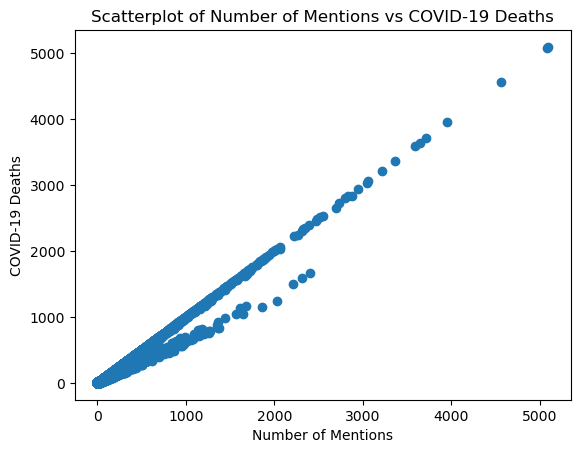

In [19]:
# scatterplot
plt.scatter(df_covid['Number of Mentions'], df_covid['COVID-19 Deaths'])
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.title('Scatterplot of Number of Mentions vs COVID-19 Deaths')
plt.show()


# Reshaping the variables into NumPy arrays

In [9]:
# Define the independent variable (x) and the dependent variable (y)
X = df_covid['Number of Mentions'].values.reshape(-1, 1)
y = df_covid['COVID-19 Deaths'].values

# Spliting the data into training and test sets

In [10]:
# 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

# Runing a linear regression

In [16]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

### There are some NaN values in X_test. So, first imputing it with mean

In [14]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Fit the imputer on the test data and transform it
X_test_imputed = imputer.transform(X_test)


In [15]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Create a plot of the regression line

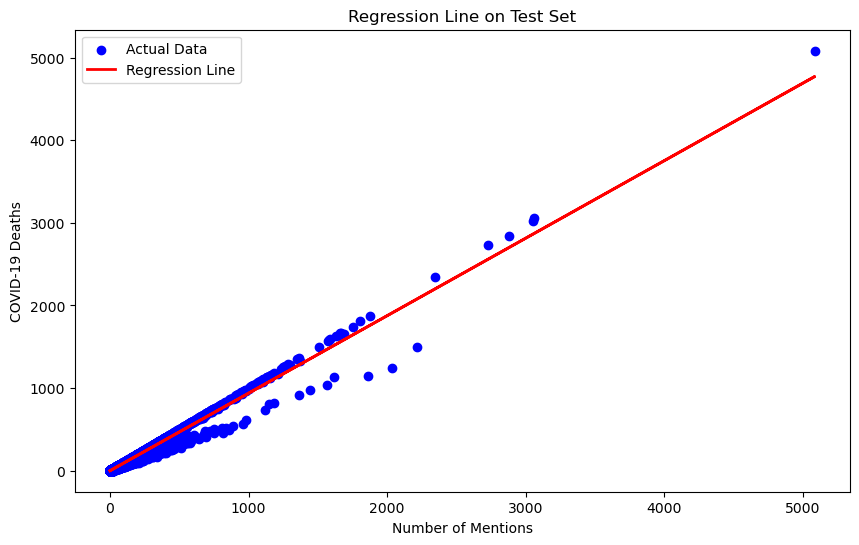

<Figure size 640x480 with 0 Axes>

In [27]:
# Plot actual vs predicted values to visualize model performance
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Line on Test Set')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.legend()
plt.show()

# Export to the "Visualizations" folder
path_p = r'C:\Users\Sanket\Documents\Achievement 6'
file_name = os.path.join(path_p, 'Analysis', 'Visualisations', 'regression_line_test_set.png')
plt.savefig(file_name)

The scatterplot and regression line visualization show a clear positive relationship between the "Number of Mentions" of a condition on death certificates and "COVID-19 Deaths".
The regression line closely follows the data points, indicating a strong fit.

# Checking model performance statistics

In [32]:
# Calculate the mean squared error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 66.73608438419116
R2 Score: 0.9752034140900298


# Comparing predicted and actual values

In [33]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)


        Actual  Predicted
0          0.0  -0.133094
1         55.0  53.352842
2          0.0  -0.133094
3          0.0  -0.133094
4          0.0  -0.133094
...        ...        ...
129163     8.0   8.312054
129164     0.0  -0.133094
129165     0.0  -0.133094
129166     1.0   3.620305
129167     0.0  -0.133094

[129168 rows x 2 columns]


### Thoughts on How Well the Model Performed
The relatively low MSE of 66.75 suggests that the model's predictions are close to the actual values.
A high R-squared score of 0.975 indicates that approximately 97.5% of the variance in "COVID-19 Deaths" can be explained by the "Number of Mentions" of conditions.
Overall, the statistics indicate that this linear regression model is effective in predicting "COVID-19 deaths" based on the "Number of Mentions".tween the "Covid 19 deaths" and "Age group”  variables.A single, straight regression line won’t be able to accurately predict anything..

In [30]:
# Save the plot to the specified folder
plt.savefig(r'C:\Users\Sanket\Documents\Achievement 6\Analysis\Visualisations\'Scatterplot of Age Group vs COVID-19 Deaths.png')


<Figure size 640x480 with 0 Axes>